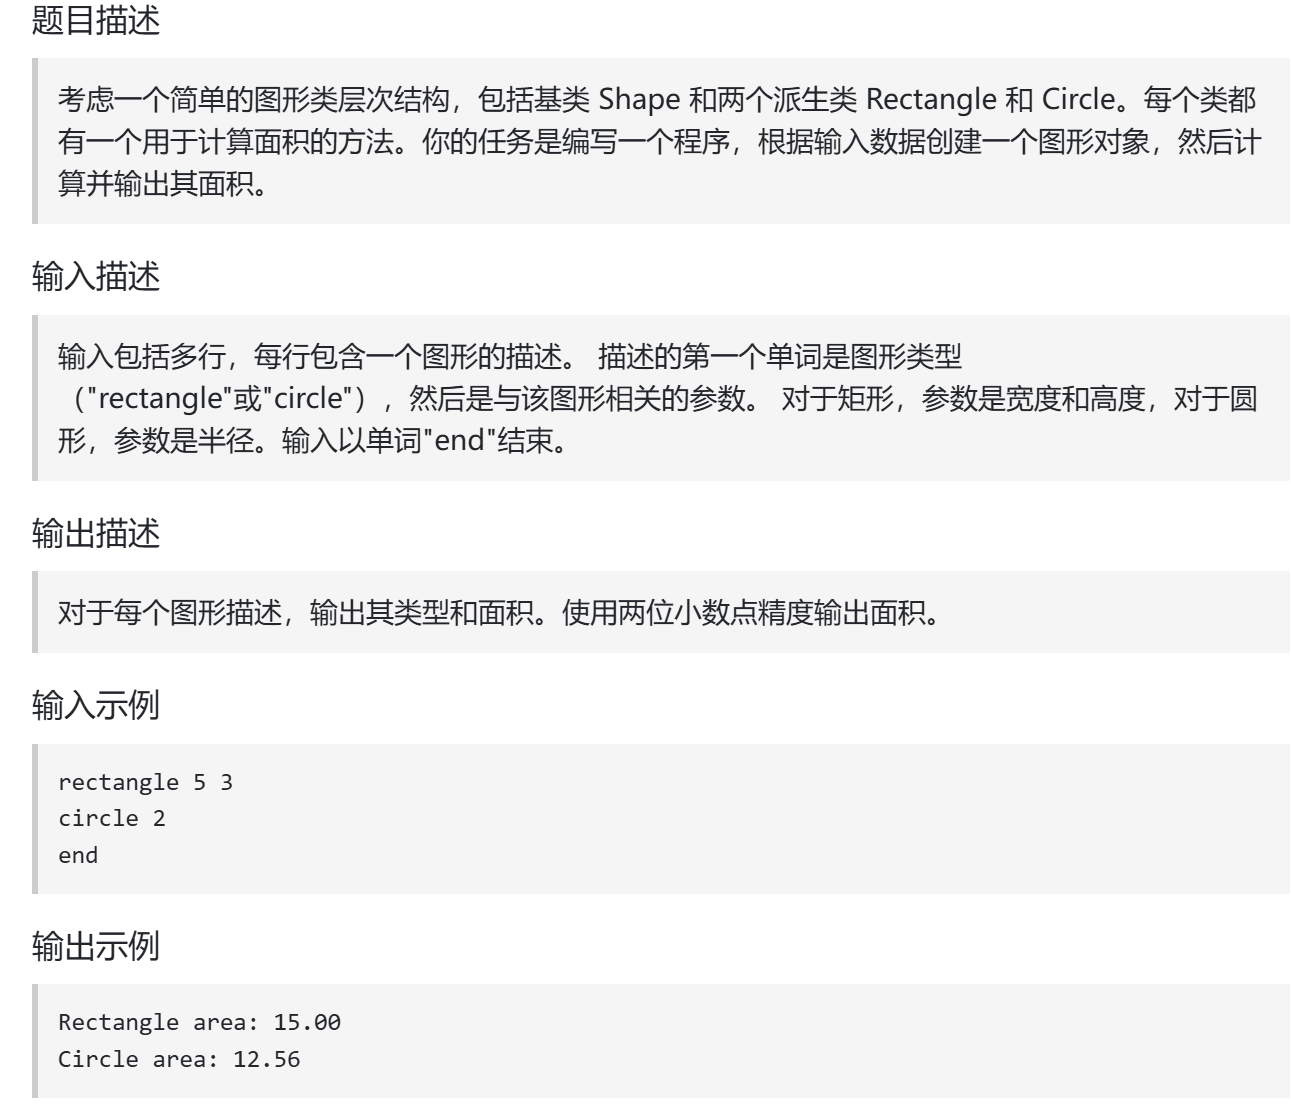

### 类

不多说，类的基本写法

### 封装


通过封装隐藏对象中一些不希望被外部所访问到的属性或方法，具体怎么做呢？可以分为两步：
- **将对象的属性名，修改为一个外部不知晓的名字**
- **提供** `getter` **和** `setter` **来获取和设置对象的属性**

In [ ]:
class Circle:
    def __init__(self, radius):
        # 1. 将属性名，修改为一个外部不知道的名字
        self.__radius = radius # 使用双下划线前缀将属性私有化
    # 2. 定义get方法，获取属性
    def get_radius(self):
        return self.__radius
    # 2. 定义set方法，设置属性
    def set_radius(self, radius):
        self.__radius = radius
        
circle = Circle(5) # 创建一个对象，半径为5
# 只有通过对应的方法，才能修改属性
circle.set_radius(10)

- 如果希望属性是只读的，则可以直接去掉setter方法
- 如果希望属性不能被外部访问，则可以直接去掉getter方法。

此外我们还可以在读取属性和修改属性的同时做一些其他的处理，比如如下的操作：

In [ ]:
def set_radius(self, radius):
    if radius > 0:
        self.__radius = radius
circle.set_radius(-10) # 不会成功设置radius属性

### 继承


假设，我们有一个图形类Shape, 它具有两个属性和一个方法，属性为**颜色**和**类型**，方法为**求图形的面积**

In [ ]:
class Shape:
    # 包含颜色和类型两个属性
    def __init__(self, shape_type, color):
        self.type = shape_type
        self.color = color
    # 计算图形面积的方法
    def calculate_area(self):
        # pass表示空语句，不需要执行任何操作
        pass
shape = Shape('shape', 'white')

我们还需要一个关于圆的类，它继承自`Shape`类

In [ ]:
# 传入Shape, 表示基础自Shape类
class Circle(Shape):
    def __init__(self, shape_type, color, radius):
        super().__init__(shape_type, color)
        self.radius = radius
    # 计算圆的面积
    def calculate_area(self):
        return 3.14 * self.radius * self.radius
      
circle = Circle('circle', 'white', 10)
# 计算圆的面积
circle.calculate_area()

在子类和父类中都有`calculate_area`这个方法，这被称为方法的重写，子类会调用自己的方法而不是父类的方法。如果子类的对象调用一个方法，发现并没有提供这个方法，就会从当前对象的父类中寻找，如果父类中有则直接调用父类中的方法

### 多态


允许不同的对象对方法调用做出不同的响应。你可以使用基类定义通用的代码，然后在派生类中提供特定的实现，从而在调用方法时调用不同的方法。

在上面的代码示例中，基类 **Shape** 实现了 `calculate_area` 方法，两个派生类 **Circle** 和 **Rectangle** 则是重写了 `calculate_area` 方法，它们有着不同的计算逻辑。之后我们创建了一个包含不同类型的图形对象的列表 **shapes**，然后循环遍历该列表并调用 `calculate_area` 方法，尽管方法名称称相同，但实际上调用的方法是根据对象的类型动态确定的，这其实就是多态的概念。

In [ ]:
# 完整代码

class Shape:
    def __init__(self, type):
        self.shape = type

    def calculate_area(self):
        pass

class Rectangle(Shape):
    def __init__(self, width, length):
        super().__init__("Rectangle")
        self.width = width
        self.length = length

    def calculate_area(self):
        return self.width * self.length

class Circle(Shape):
    def __init__(self, radius):
        super().__init__("Circle")
        self.radius = radius

    def calculate_area(self):
        return 3.14 * self.radius ** 2

# 创建一个队列用来存储封装的对象
shapes = []


while True:
    datas = input().split()
    # 输入的第一个字符是形状
    type = datas[0]
    # 先看看是不是end结束语句
    if type == "end":
        break

    if type == "Rectangle":
        width, length = int(datas[1]), int(datas[2])
        # 这里要新建一个对象添加到shapes中
        shapes.append(Rectangle(width, length))

    elif type == "Circle":
        radius = int(datas[1])
        shapes.append(Circle(radius))

for element in shapes:
    print(f"{element.shape} area {element.calculate_area():.2f}")


### shapes列表中存储的是什么



In [ ]:
shapes = []
shapes.append(Rectangle(width, height))
shapes.append(Circle(radius))



**shapes列表中存储的不是原始数据（长宽或半径），而是完整的对象实例**。每个对象都包含：
1. 数据（如矩形的宽高或圆形的半径）
2. 行为（如计算面积的方法）

### 为什么要用循环遍历

循环代码：


In [ ]:
for shape in shapes:
    print(f"{shape.type} area: {shape.calculate_area():.2f}")



这展示了面向对象编程中的**多态性**：
- 每个`shape`对象都是不同类型（Rectangle或Circle）
- 每个对象都有自己的`type`属性和`calculate_area()`方法
- 虽然都调用`calculate_area()`，但会根据对象类型执行不同的计算逻辑

### 具体过程

当循环执行时：
- 遇到Rectangle对象：输出"Rectangle area: 宽×高"
- 遇到Circle对象：输出"Circle area: 3.14×半径²"

这种设计让代码更加简洁，不需要分别处理每种形状，也更容易扩展（如添加新形状类型）。

这就是面向对象编程的强大之处——通过对象封装数据和行为，通过多态统一处理不同类型。